In [148]:
import psycopg2
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
con = psycopg2.connect(
    host = 'localhost',
    database = 'formula1',
    user = 'postgres',
    password  = '1804Rex03-19')  

In [150]:
# Queries
# utilize aggregate functions to create new variables
driver_pit_stop_data_query = ("SELECT driverId, avg(duration) AS avg_duration, sum(stop) AS num_stops, count(raceId) AS num_races\
                               FROM f1_tables.pit_stops \
                               GROUP BY driverId \
                               ORDER BY driverId;")

driver_wins_query = ("SELECT driverId, avg(wins) AS avg_wins \
                             FROM f1_tables.driver_standings \
                             GROUP BY driverId \
                             ORDER BY driverId;")

driver_points_query = ("SELECT driverId, avg(points) AS avg_points \
                             FROM f1_tables.driver_standings \
                             GROUP BY driverId \
                             ORDER BY driverId;")

pit_stop_data = sqlio.read_sql_query(driver_pit_stop_data_query, con)
driver_wins = sqlio.read_sql_query(driver_wins_query, con)
driver_points = sqlio.read_sql_query(driver_points_query, con)

/var/folders/_n/k6g0_p9n0j3b0d9q2rsvlz_00000gn/T/ipykernel_40266/940033477.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pit_stop_data = sqlio.read_sql_query(driver_pit_stop_data_query, con)
/var/folders/_n/k6g0_p9n0j3b0d9q2rsvlz_00000gn/T/ipykernel_40266/940033477.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  driver_wins = sqlio.read_sql_query(driver_wins_query, con)
/var/folders/_n/k6g0_p9n0j3b0d9q2rsvlz_00000gn/T/ipykernel_40266/940033477.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  driver_points = 

,driverid,avg_duration,num_stops,num_races,avg_wins,avg_points,avg_stops,winner
0,1,22.981693,779,437,3.385382,145.835548,1.782609,True
1,2,22.400000,46,25,0.000000,14.587629,1.840000,False
2,3,22.758197,441,244,1.305825,82.087379,1.807377,True
3,4,23.095775,624,355,0.985755,56.994302,1.757746,True
4,5,24.141414,191,99,0.072072,8.585586,1.929293,True
...,...,...,...,...,...,...,...,...
64,851,29.666667,6,3,0.000000,0.000000,2.000000,False
65,852,24.672414,106,58,0.000000,11.828571,1.827586,False
66,853,24.972222,66,36,0.000000,0.000000,1.833333,False
67,854,26.410714,99,56,0.000000,1.142857,1.767857,False


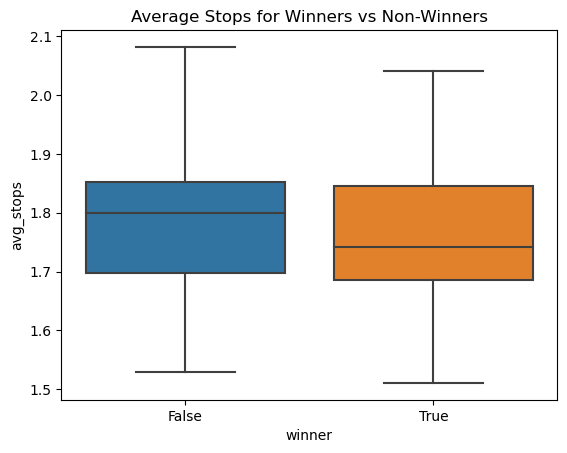

In [151]:
# join all three tables
data1 = pd.merge(pit_stop_data, driver_wins, how="inner", on="driverid")
full_data = pd.merge(data1, driver_points, how="inner", on="driverid")
full_data

full_data["avg_stops"] = full_data.apply(lambda x: x["num_stops"]/x["num_races"], axis=1)

full_data["winner"] = full_data.apply(lambda x: x.avg_wins >0, axis=1)

fig, ax = plt.subplots() 
sns.boxplot(data=full_data, x='winner', y = 'avg_stops', showfliers = False, ax=ax).set(title="Average Stops for Winners vs Non-Winners")

full_data

[Text(0.5, 1.0, 'Average Pit Stop Duration for Winners vs Non-Winners')]

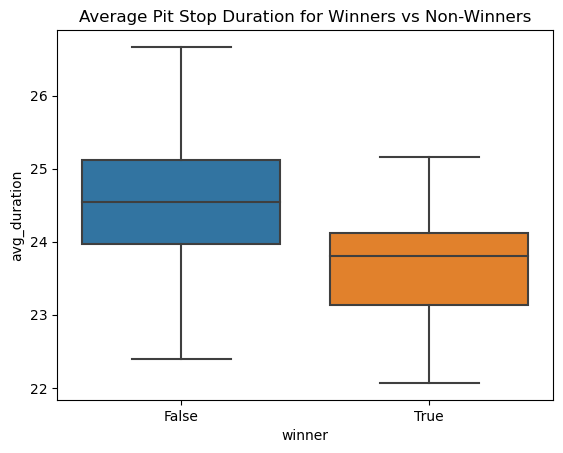

In [152]:
fig1, ax1 = plt.subplots() 
sns.boxplot(data=full_data, x='winner', y = 'avg_duration', showfliers = False, ax=ax1).set(title='Average Pit Stop Duration for Winners vs Non-Winners')

Text(0.5, 1.0, 'Correlation between Average Number of Pit Stops and Average Points')

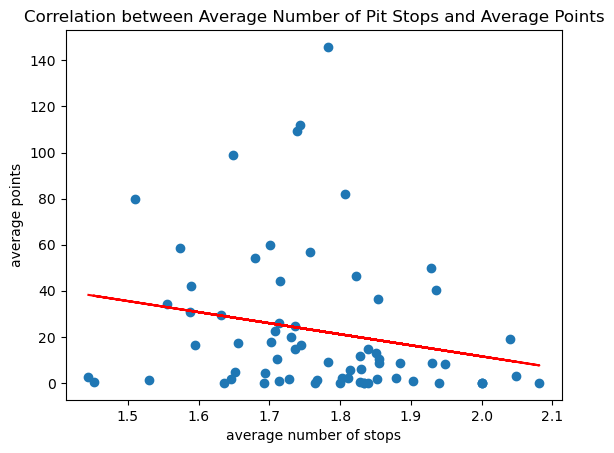

In [153]:
plt.plot(full_data["avg_stops"], full_data["avg_points"], 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(full_data["avg_stops"], full_data["avg_points"], 1)

#add linear regression line to scatterplot 
plt.plot(full_data["avg_stops"], m*(full_data["avg_stops"])+b, color='red')

plt.xlabel("average number of stops")
plt.ylabel("average points")
plt.title("Correlation between Average Number of Pit Stops and Average Points")

